In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv("british_airways_reviews_cleaned.csv")

In [3]:
df.head(5)

,reviews,stars,date,country,verified,cleaned_reviews
0,Not Verified | Very good flight following an ...,9,2025-01-20,United Kingdom,False,good flight following equally good flight rome...
1,Not Verified | An hour's delay due to late ar...,7,2025-01-19,United Kingdom,False,hour delay due late arrival incoming aircraft ...
2,✅ Trip Verified | I booked through BA becaus...,1,2025-01-15,United Kingdom,True,booked ba loganair representative manchester a...
3,✅ Trip Verified | British airways lost bags ...,1,2025-01-09,United States,True,british airway lost bag lhr found sent cologne...
4,✅ Trip Verified | The check in process and rew...,1,2025-01-05,Netherlands,True,check process reward loyalty program mess neve...


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.describe()

,stars,date
count,3497.000000,3497
mean,4.527023,2018-07-01 05:46:43.202745088
min,1.000000,2014-11-20 00:00:00
25%,1.000000,2016-02-13 00:00:00
50%,4.000000,2017-07-24 00:00:00
75%,8.000000,2019-12-24 00:00:00
max,10.000000,2025-01-20 00:00:00
std,3.141299,NaN


Analysing Star Ratings

In [6]:
## Mean stars (ratings out of 10)
print(df['stars'].mean())

## Median stars (ratings out of 10)
print(df['stars'].median())

4.527023162710895
4.0


In [7]:
df.head()

,reviews,stars,date,country,verified,cleaned_reviews
0,Not Verified | Very good flight following an ...,9,2025-01-20,United Kingdom,False,good flight following equally good flight rome...
1,Not Verified | An hour's delay due to late ar...,7,2025-01-19,United Kingdom,False,hour delay due late arrival incoming aircraft ...
2,✅ Trip Verified | I booked through BA becaus...,1,2025-01-15,United Kingdom,True,booked ba loganair representative manchester a...
3,✅ Trip Verified | British airways lost bags ...,1,2025-01-09,United States,True,british airway lost bag lhr found sent cologne...
4,✅ Trip Verified | The check in process and rew...,1,2025-01-05,Netherlands,True,check process reward loyalty program mess neve...


Text(0.5, 1.0, 'Counts per Star Rating')

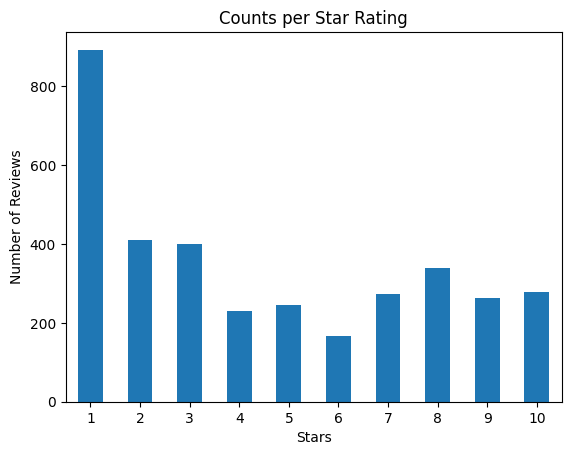

In [8]:
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.title("Counts per Star Rating")

It can be seen that 1 star out of 10 has the most counts.

Convert this to percentage

In [9]:
star_ratings_df = pd.DataFrame(df['stars'].value_counts())
print(star_ratings_df)

       count
stars       
1        892
2        410
3        400
8        338
10       279
7        274
9        263
5        244
4        231
6        166


In [10]:
percentage_of_total = round((star_ratings_df['count'] / star_ratings_df['count'].sum() * 100),2)
star_ratings_df['percentage_of_total'] = percentage_of_total

In [11]:
star_ratings_df = star_ratings_df.reset_index()
print(star_ratings_df)

   stars  count  percentage_of_total
0      1    892                25.51
1      2    410                11.72
2      3    400                11.44
3      8    338                 9.67
4     10    279                 7.98
5      7    274                 7.84
6      9    263                 7.52
7      5    244                 6.98
8      4    231                 6.61
9      6    166                 4.75


Text(0.5, 1.0, 'Percentage for each star ratings')

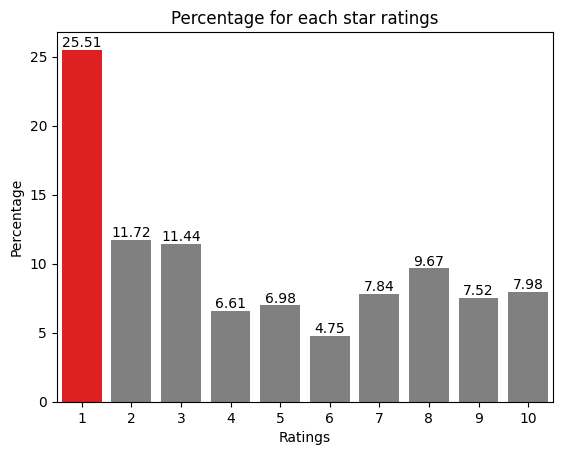

In [73]:
colours = ['Red' if (x ==  max(star_ratings_df['percentage_of_total'])) else 'grey' for x in star_ratings_df['percentage_of_total'] ]
ax = sns.barplot(x=star_ratings_df['stars'], y=star_ratings_df['percentage_of_total'], data=star_ratings_df, errwidth=0,
                palette=colours)

ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Percentage")
ax.set_title("Percentage for each star ratings")

Analysing stars wrt to country

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Germany')])

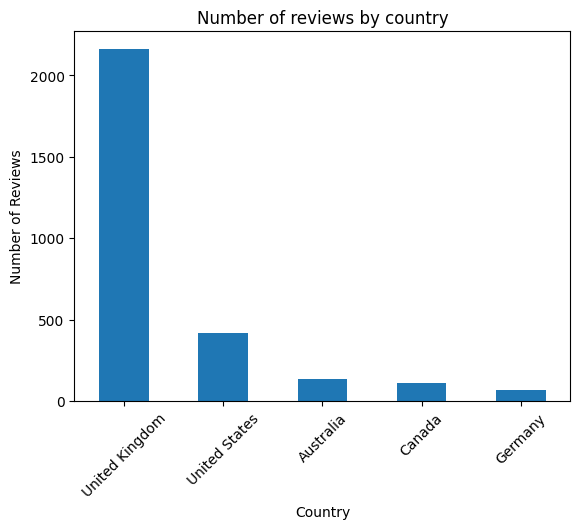

In [13]:
df.country.value_counts().head().plot(kind='bar')
plt.title('Number of reviews by country')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

Plotting the country with the lowest average ratings

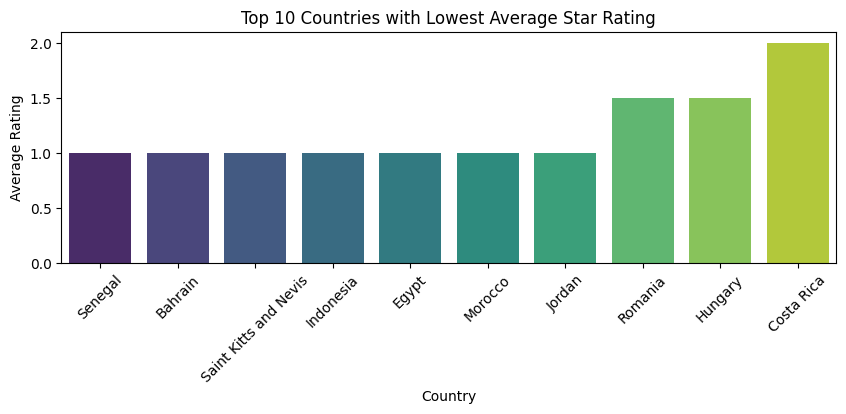

In [76]:
# Calculate the average rating per country
avg_rating_per_country = df.groupby('country')['stars'].mean().sort_values().head(10)

# Plot the top 12 countries with the highest average rating
plt.figure(figsize=(10, 3))
sns.barplot(x=avg_rating_per_country.index, y=avg_rating_per_country.values, palette='viridis')
plt.title('Top 10 Countries with Lowest Average Star Rating')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Sentiment Analysis

In [15]:
import nltk
from nltk.tokenize import word_tokenize


In [16]:
df.head()

,reviews,stars,date,country,verified,cleaned_reviews
0,Not Verified | Very good flight following an ...,9,2025-01-20,United Kingdom,False,good flight following equally good flight rome...
1,Not Verified | An hour's delay due to late ar...,7,2025-01-19,United Kingdom,False,hour delay due late arrival incoming aircraft ...
2,✅ Trip Verified | I booked through BA becaus...,1,2025-01-15,United Kingdom,True,booked ba loganair representative manchester a...
3,✅ Trip Verified | British airways lost bags ...,1,2025-01-09,United States,True,british airway lost bag lhr found sent cologne...
4,✅ Trip Verified | The check in process and rew...,1,2025-01-05,Netherlands,True,check process reward loyalty program mess neve...


In [17]:
example = df['cleaned_reviews'][0]
print(example)

good flight following equally good flight rome good food especially evening flight aircraft early way short haul


In [18]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['good',
 'flight',
 'following',
 'equally',
 'good',
 'flight',
 'rome',
 'good',
 'food',
 'especially']

In [19]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('good', 'JJ'),
 ('flight', 'NN'),
 ('following', 'VBG'),
 ('equally', 'RB'),
 ('good', 'JJ'),
 ('flight', 'NN'),
 ('rome', 'NN'),
 ('good', 'JJ'),
 ('food', 'NN'),
 ('especially', 'RB')]

In [20]:
## Putting the tagged pos into an entity
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  good/JJ
  flight/NN
  following/VBG
  equally/RB
  good/JJ
  flight/NN
  rome/NN
  good/JJ
  food/NN
  especially/RB
  evening/VBG
  flight/NN
  aircraft/NN
  early/JJ
  way/NN
  short/JJ
  haul/NN)


VADER Sentiment Scoring

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
df['id'] = df.index

In [23]:
df.head()

,reviews,stars,date,country,verified,cleaned_reviews,id
0,Not Verified | Very good flight following an ...,9,2025-01-20,United Kingdom,False,good flight following equally good flight rome...,0
1,Not Verified | An hour's delay due to late ar...,7,2025-01-19,United Kingdom,False,hour delay due late arrival incoming aircraft ...,1
2,✅ Trip Verified | I booked through BA becaus...,1,2025-01-15,United Kingdom,True,booked ba loganair representative manchester a...,2
3,✅ Trip Verified | British airways lost bags ...,1,2025-01-09,United States,True,british airway lost bag lhr found sent cologne...,3
4,✅ Trip Verified | The check in process and rew...,1,2025-01-05,Netherlands,True,check process reward loyalty program mess neve...,4


In [24]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'cleaned_reviews' column
df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isaacsoong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews,stars,date,country,verified,cleaned_reviews,id
0,Not Verified | Very good flight following an ...,9,2025-01-20,United Kingdom,False,good flight following equally good flight rome...,0
1,Not Verified | An hour's delay due to late ar...,7,2025-01-19,United Kingdom,False,hour delay due late arrival incoming aircraft ...,1
2,✅ Trip Verified | I booked through BA becaus...,1,2025-01-15,United Kingdom,True,booked ba loganair representative manchester a...,2
3,✅ Trip Verified | British airways lost bags ...,1,2025-01-09,United States,True,british airway lost bag lhr found sent cologne...,3
4,✅ Trip Verified | The check in process and rew...,1,2025-01-05,Netherlands,True,check process reward loyalty program mess neve...,4


In [25]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_reviews']
    myid = row['id']
    result[myid] = sia.polarity_scores(text)
    

  0%|          | 0/3497 [00:00<?, ?it/s]

In [26]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns = {'index':'id'})
vaders = vaders.merge(df,how = 'left')

In [27]:
vaders.head()

,id,neg,neu,pos,compound,reviews,stars,date,country,verified,cleaned_reviews
0,0,0.000,0.617,0.383,0.8271,Not Verified | Very good flight following an ...,9,2025-01-20,United Kingdom,False,good flight following equally good flight rome...
1,1,0.156,0.525,0.319,0.8442,Not Verified | An hour's delay due to late ar...,7,2025-01-19,United Kingdom,False,hour delay due late arrival incoming aircraft ...
2,2,0.145,0.735,0.120,0.1566,✅ Trip Verified | I booked through BA becaus...,1,2025-01-15,United Kingdom,True,booked ba loganair representative manchester a...
3,3,0.086,0.914,0.000,-0.5423,✅ Trip Verified | British airways lost bags ...,1,2025-01-09,United States,True,british airway lost bag lhr found sent cologne...
4,4,0.227,0.533,0.240,0.3400,✅ Trip Verified | The check in process and rew...,1,2025-01-05,Netherlands,True,check process reward loyalty program mess neve...


Plot VADER results

Text(0.5, 1.0, 'Compound Score by Star Review')

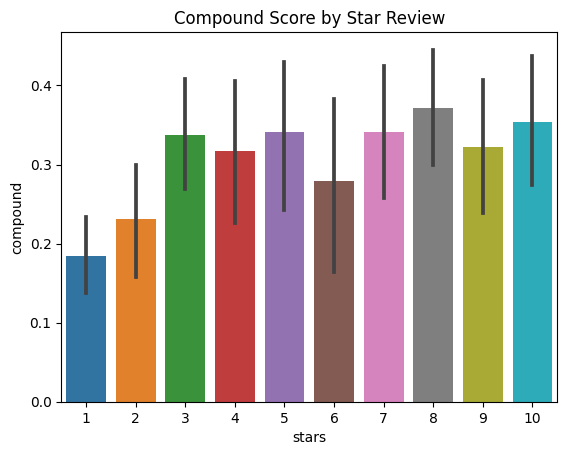

In [28]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compound Score by Star Review')

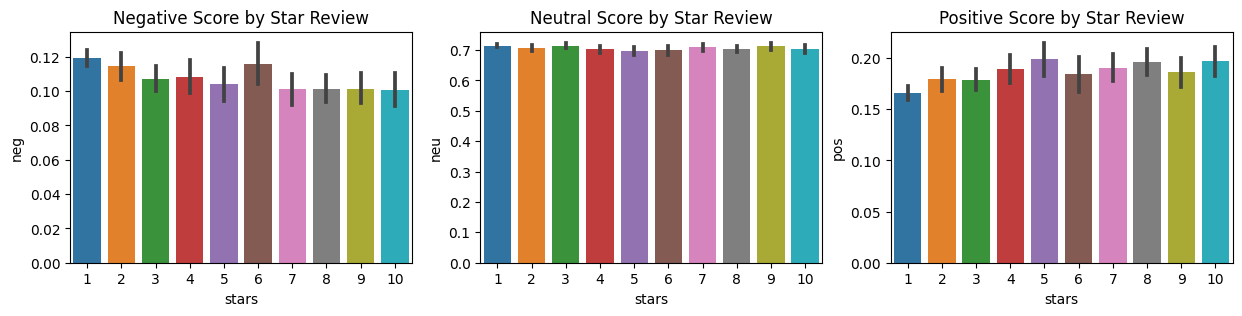

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[2])
axs[0].set_title('Negative Score by Star Review')
axs[1].set_title('Neutral Score by Star Review')
axs[2].set_title('Positive Score by Star Review')
plt.show()

In [30]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
vaders['Analysis'] = vaders['compound'].apply(vader_analysis)
vaders.head()

,id,neg,neu,pos,compound,reviews,stars,date,country,verified,cleaned_reviews,Analysis
0,0,0.000,0.617,0.383,0.8271,Not Verified | Very good flight following an ...,9,2025-01-20,United Kingdom,False,good flight following equally good flight rome...,Positive
1,1,0.156,0.525,0.319,0.8442,Not Verified | An hour's delay due to late ar...,7,2025-01-19,United Kingdom,False,hour delay due late arrival incoming aircraft ...,Positive
2,2,0.145,0.735,0.120,0.1566,✅ Trip Verified | I booked through BA becaus...,1,2025-01-15,United Kingdom,True,booked ba loganair representative manchester a...,Neutral
3,3,0.086,0.914,0.000,-0.5423,✅ Trip Verified | British airways lost bags ...,1,2025-01-09,United States,True,british airway lost bag lhr found sent cologne...,Negative
4,4,0.227,0.533,0.240,0.3400,✅ Trip Verified | The check in process and rew...,1,2025-01-05,Netherlands,True,check process reward loyalty program mess neve...,Neutral


In [31]:
vader_counts = vaders['Analysis'].value_counts()
vader_counts

Analysis
Positive    1923
Negative    1199
Neutral      375
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1761b14b0>,
 [Text(-0.1732976027308136, 1.0963885902761634, 'Positive'),
  Text(-0.1988567335988323, -1.0920421235018378, 'Negative'),
  Text(1.0476046551535243, -0.36691209642183437, 'Neutral')],
 [Text(-0.0952356195187354, 0.6025198559175313, '55.0%'),
  Text(-0.10928162837413305, -0.6001312570595685, '34.3%'),
  Text(0.5757106663456304, -0.20163637731289993, '10.7%')])

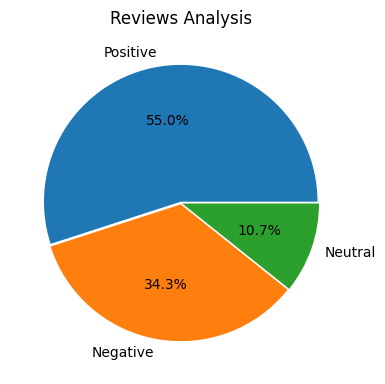

In [32]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.01, 0.01, 0.01), autopct='%1.1f%%', shadow=False)

In [33]:
vaders.query('stars == 1').sort_values('compound',ascending = False)['cleaned_reviews'].values[0]

'supposed fly aeroflot rd december moscow russia closed border like majority country flight canceled get home also tried fly antalya situation occurred third try came heathrow tried fly away cairo declined another company went british airway starting testing egypt requires test stressful whole situation employee outstanding sure connected ba still want mention crew helpful extremely understanding professional urgent help great help gracious want separately point one employee shanell mistaken work collision testing center heathrow terminal savior importantly human rare nowadays carrying went ba check unfortunately result go yet however another outstanding employee provided great help called colleague arranged booking frozen result arrive come time additional question every time patient professional happy help got result came back heathrow th unfortunately flight cairo situation became even complicated spare detail however brilliant employee ba offered personal assistance showed sympathy

Word Cloud

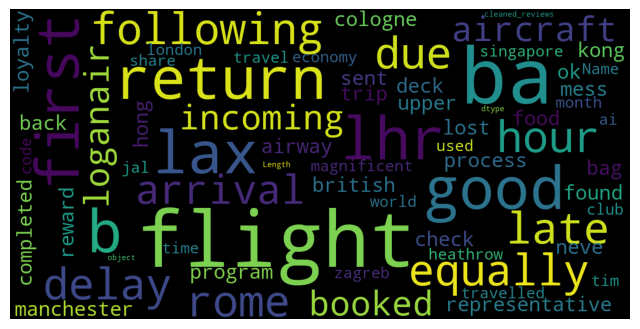

In [84]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=500,
        max_font_size=50,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(vaders['cleaned_reviews'])

In [35]:
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])

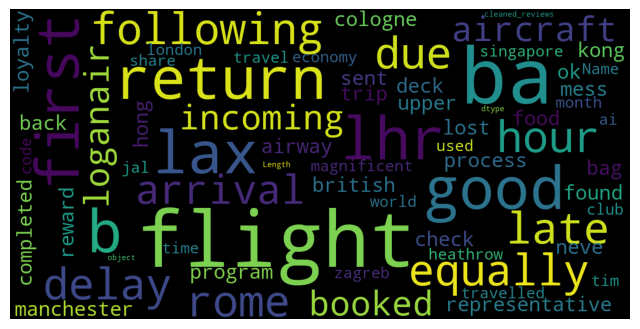

In [85]:
show_wordcloud(vaders['cleaned_reviews'])

In [45]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Define the additional stop words
additional_stop_words = ['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline", "heathrow", "plane", "lhr", "review"]

# Combine the additional stop words with the existing stop words
all_stop_words = set(stop_words).union(additional_stop_words)

# Tokenize all the cleaned reviews
tokenized_reviews = df['cleaned_reviews'].apply(word_tokenize)

# Flatten the list of tokenized reviews into a single list of words
all_words = [word for review in tokenized_reviews for word in review if word.lower() not in all_stop_words]

# Use FreqDist to calculate word frequencies
freq_dist = FreqDist(all_words)

# Sort the words by their frequencies in descending order
sorted_words = freq_dist.most_common(10)

# Display the most frequent words
print(sorted_words)


[('seat', 4173), ('service', 2860), ('time', 2336), ('food', 2131), ('crew', 2052), ('cabin', 1901), ('good', 1876), ('class', 1876), ('hour', 1868), ('one', 1633)]


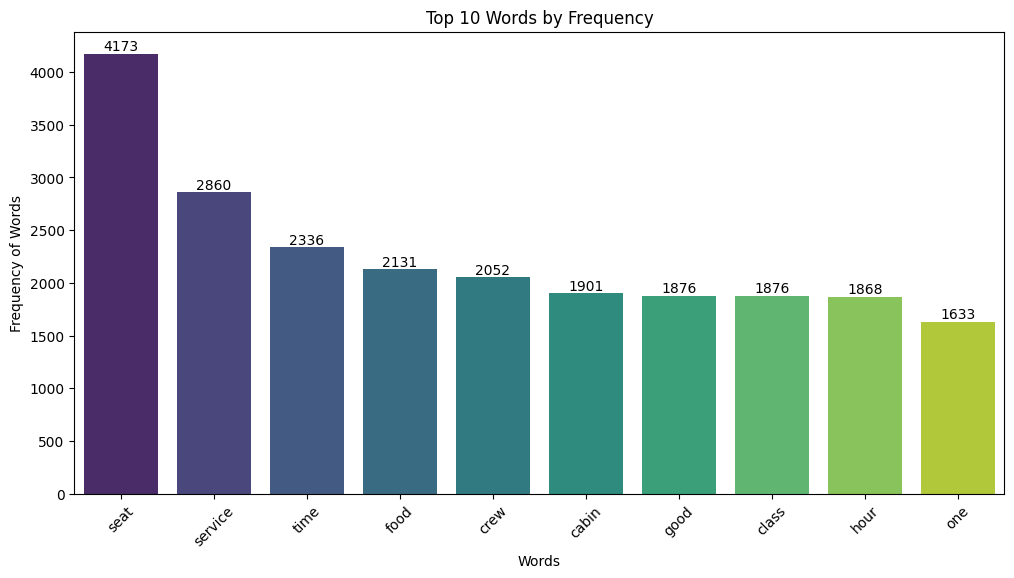

In [48]:
# Extract the top 10 words and their counts
top_10_words = sorted_words[:10]
words, counts = zip(*top_10_words)

# Create a barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(words), y=list(counts), palette='viridis')

# Add labels above the bars
for i, count in enumerate(counts):
    ax.text(i, count + 1, round(count, 2), ha='center', va='bottom')

# Set plot title and labels
ax.set_title('Top 10 Words by Frequency')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency of Words')
plt.xticks(rotation=45)
plt.show()

From this visualisation, we can tell that the words seats,service and time come up most often, however, we cannot tell if this is a positive or negative comment.

We can use ngrams to better understand the sentiments of these words and phrases.

In [68]:
from nltk import ngrams
from collections import Counter

# Define function to get 4-word n-grams for a subset of reviews
def generate_ngrams(reviews, n=4):
    # Tokenize the reviews
    tokenized_reviews = reviews.apply(word_tokenize)
    
    # Flatten the list of tokenized reviews and remove stop words
    all_words = [word for review in tokenized_reviews for word in review if word.lower() not in all_stop_words]
    
    # Generate n-grams
    ngrams_list = list(ngrams(all_words, n))
    
    # Calculate frequency of n-grams
    return Counter(ngrams_list)

# Filter reviews based on star rating groups
group_1_3 = df[df['stars'].between(1, 3)]['cleaned_reviews']
group_4_6 = df[df['stars'].between(4, 6)]['cleaned_reviews']
group_7_10 = df[df['stars'].between(7, 10)]['cleaned_reviews']

# Generate 4-word n-grams for each group
ngrams_1_3 = generate_ngrams(group_1_3)
ngrams_4_6 = generate_ngrams(group_4_6)
ngrams_7_10 = generate_ngrams(group_7_10)

# Get the top 20 most common 4-word n-grams for each group
top_20_ngrams_1_3 = ngrams_1_3.most_common(20)
top_20_ngrams_4_6 = ngrams_4_6.most_common(20)
top_20_ngrams_7_10 = ngrams_7_10.most_common(20)

# Display the results
print("Top 20 4-word ngrams for 1-3 stars:")
for ngram, freq in top_20_ngrams_1_3:
    print(f"{' '.join(ngram)}: {freq}")

print("\nTop 20 4-word ngrams for 4-6 stars:")
for ngram, freq in top_20_ngrams_4_6:
    print(f"{' '.join(ngram)}: {freq}")

print("\nTop 20 4-word ngrams for 7-10 stars:")
for ngram, freq in top_20_ngrams_7_10:
    print(f"{' '.join(ngram)}: {freq}")


Top 20 4-word ngrams for 1-3 stars:
short haul business class: 7
business class seat economy: 6
world traveller plus premium: 5
worst business class experience: 4
customer service non existent: 4
club europe business class: 4
cabin crew friendly attentive: 4
traveller plus premium economy: 4
business class club world: 4
business class premium economy: 3
food good well presented: 3
mr gurvir singh dhillon: 3
expensive last minute ticket: 3
person front reclined seat: 3
seat business class seat: 3
flying world traveller plus: 3
club world business class: 3
full fare business class: 3
hr negative covid test: 3
worst customer service ever: 3

Top 20 4-word ngrams for 4-6 stars:
long haul business class: 6
business class product even: 3
business class club world: 3
cabin crew friendly helpful: 3
food awful cabin crew: 3
world traveller plus premium: 2
traveller plus premium economy: 2
hour phone customer service: 2
cabin crew friendly professional: 2
use fast track security: 2
crew excellen

In [77]:
def plot_ngrams(ngrams, title):
    # Extract the n-grams and their frequencies
    ngrams, freqs = zip(*ngrams)

    # Convert n-grams from tuples to strings
    ngrams = [' '.join(ngram) for ngram in ngrams]

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=list(freqs), y=list(ngrams), palette='viridis')

    # Set plot title and labels
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('4-Word N-Grams')
    plt.show()

Plotting the top 20 4-word n-grams for each group

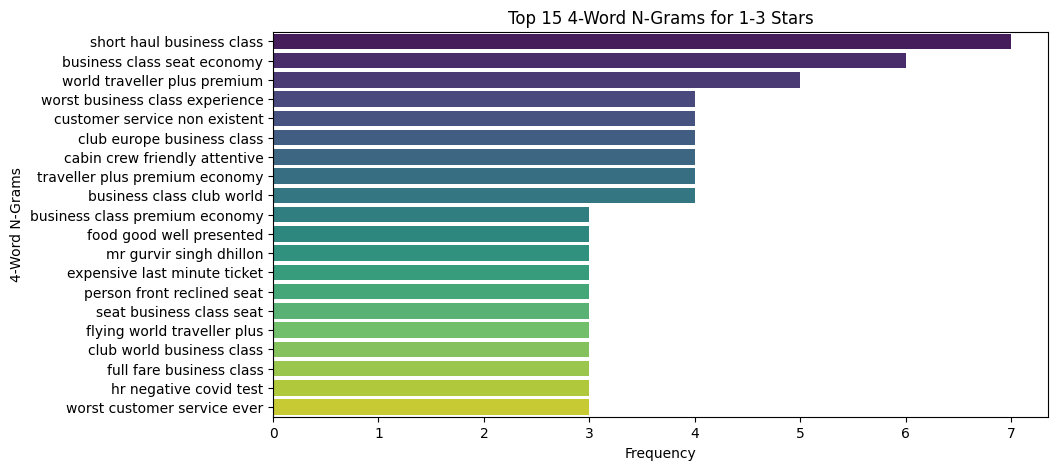

In [78]:
plot_ngrams(top_20_ngrams_1_3, 'Top 15 4-Word N-Grams for 1-3 Stars')

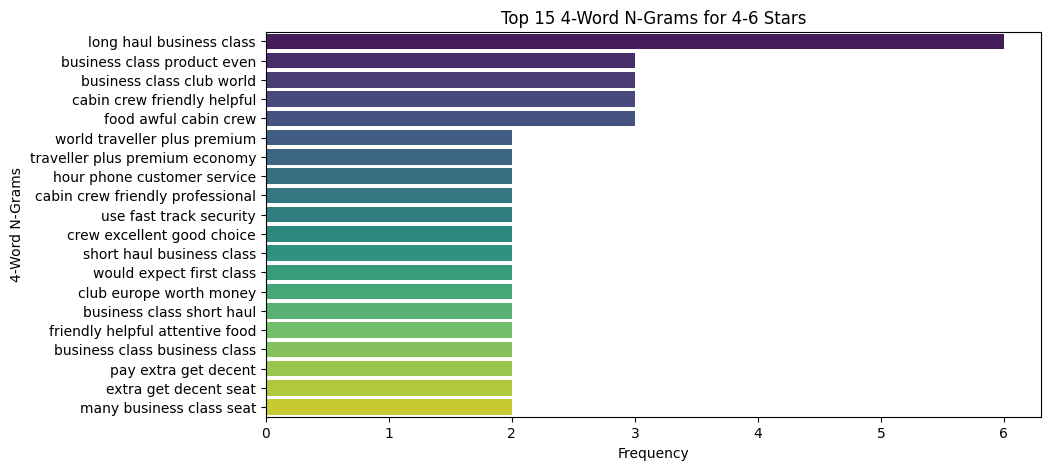

In [80]:
plot_ngrams(top_20_ngrams_4_6, 'Top 15 4-Word N-Grams for 4-6 Stars')

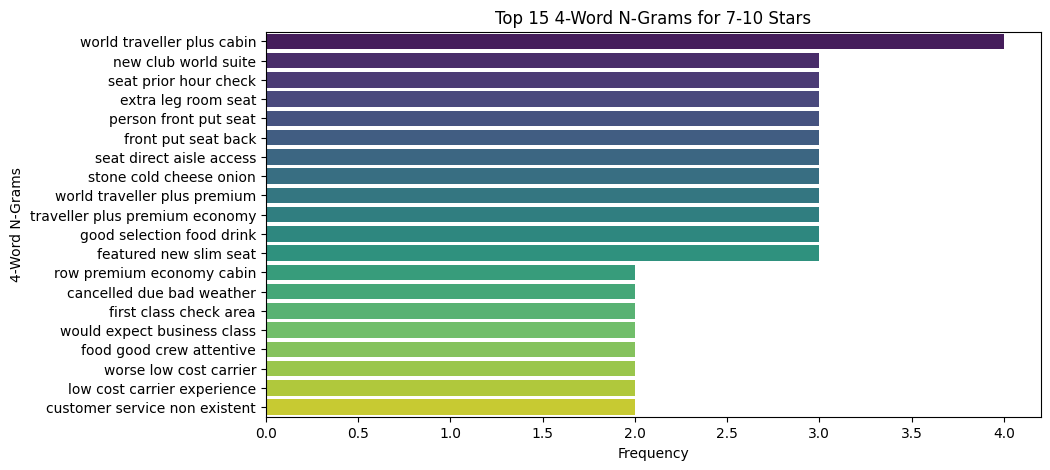

In [79]:
plot_ngrams(top_20_ngrams_7_10, 'Top 15 4-Word N-Grams for 7-10 Stars')

From the visualisation (1-3 stars), we can tell that there are differing views on customer service. Looking into the reviews itself, I found that the cabin crew received mostly positive reviews, while the ground staff received bad reviews. On the other hand, BA's food received positive reviews.

From the visualisation (7-10 stars), the sentiments towards customer service remains the same as that of 1-3 stars. There were positive reviews regarding
the infrastructure of the seats such as leg room and good selection of food and drinks. These could be because they took business / first class.

In [86]:
vaders.shape

(3497, 12)

In [87]:
vaders['stars'].mean()

4.527023162710895